In [10]:
import numpy as np
import pandas
from pandas import DataFrame, Series
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
from matplotlib.pyplot import scatter, xlabel, ylabel, savefig
% matplotlib inline

In [11]:
data_str = '''Region\tAlcohol\tTobacco
North\t6.47\t4.03
Yorkshire\t6.13\t3.76
Northeast\t6.19\t3.77
East Midlands\t4.89\t3.34
West Midlands\t5.63\t3.47
East Anglia\t4.52\t2.92
Southeast\t5.89\t3.20
Southwest\t4.79\t2.71
Wales\t5.27\t3.53
Scotland\t6.08\t4.51
Northern Ireland\t4.02\t4.56'''

In [12]:
d = data_str.split('\n')
d = [ i.split('\t') for i in d ]

In [13]:
d

[['Region', 'Alcohol', 'Tobacco'],
 ['North', '6.47', '4.03'],
 ['Yorkshire', '6.13', '3.76'],
 ['Northeast', '6.19', '3.77'],
 ['East Midlands', '4.89', '3.34'],
 ['West Midlands', '5.63', '3.47'],
 ['East Anglia', '4.52', '2.92'],
 ['Southeast', '5.89', '3.20'],
 ['Southwest', '4.79', '2.71'],
 ['Wales', '5.27', '3.53'],
 ['Scotland', '6.08', '4.51'],
 ['Northern Ireland', '4.02', '4.56']]

In [14]:
for i in range( len( d ) ):
    for j in range( len( d[0] ) ):
        try:
            d[i][j] = float( d[i][j] )
        except:
            pass

In [6]:
df = DataFrame( d[1:], columns=d[0] )

In [7]:
df

,Region,Alcohol,Tobacco
0,North,6.47,4.03
1,Yorkshire,6.13,3.76
2,Northeast,6.19,3.77
3,East Midlands,4.89,3.34
4,West Midlands,5.63,3.47
5,East Anglia,4.52,2.92
6,Southeast,5.89,3.20
7,Southwest,4.79,2.71
8,Wales,5.27,3.53
9,Scotland,6.08,4.51


In [15]:
# If reading the .txt file which can be downloaded from the DASL website
# (the columns in the file are separated by tabs):

df_readTXT = pandas.read_table('tobacco-and-alcohol.txt', sep='\t', header='infer')
df_readTXT

FileNotFoundError: File b'tobacco-and-alcohol.txt' does not exist

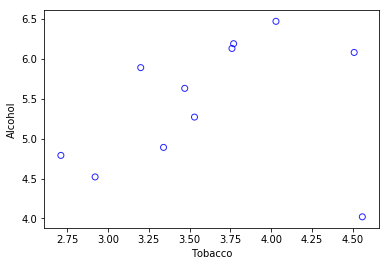

In [16]:
scatter( df.Tobacco, df.Alcohol,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=0.85 )
xlabel('Tobacco')
ylabel('Alcohol')
savefig('alcohol_v_tobacco.png', fmt='png', dpi=100)

In [17]:
df['Eins'] = np.ones(( len(df), ))
Y = df.Alcohol[:-1]
X = df[['Tobacco','Eins']][:-1]
result = sm.OLS( Y, X ).fit()
result.summary()

C:\Users\anjus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Alcohol   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     12.78
Date:                Sat, 17 Nov 2018   Prob (F-statistic):            0.00723
Time:                        12:15:36   Log-Likelihood:                -4.9998
No. Observations:                  10   AIC:                             14.00
Df Residuals:                       8   BIC:                             14.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Tobacco        1.0059      0.281      3.576      0.007       0.357       1.655
Eins           2.0412      1.001      2.038      0.076      -0.268       4.350
==============================================================================
Omnibus:                        2.542   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                0.904
Skew:                          -0.014   Prob(JB):                        0.636
Kurtosis:                       1.527   Cond. No.                         27.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Now with the outlier
df['Eins'] = np.ones(( len(df), ))
X = df[['Tobacco','Eins']]
Y = df.Alcohol
result = sm.OLS( Y, X ).fit()
result.summary()

C:\Users\anjus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Alcohol   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                 -0.056
Method:                 Least Squares   F-statistic:                    0.4735
Date:                Sat, 17 Nov 2018   Prob (F-statistic):              0.509
Time:                        12:15:48   Log-Likelihood:                -12.317
No. Observations:                  11   AIC:                             28.63
Df Residuals:                       9   BIC:                             29.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Tobacco        0.3019      0.439      0.688      0.509      -0.691       1.295
Eins           4.3512      1.607      2.708      0.024       0.717       7.986
==============================================================================
Omnibus:                        3.123   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.210   Jarque-Bera (JB):                1.397
Skew:                          -0.873   Prob(JB):                        0.497
Kurtosis:                       3.022   Cond. No.                         25.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Regression Using Sklearn

In [19]:
import matplotlib.pyplot as plt

data = np.matrix( df )

In [20]:
cln = LinearRegression() # without Northern Ireland
org = LinearRegression() # with Northern Ireland
 
X, Y = data[:,2], data[:,1]
cln.fit( X[:-1], Y[:-1] )
org.fit( X, Y )
 
clean_score = '{0:.3f}'.format( cln.score( X[:-1], Y[:-1] ) )
original_score = '{0:.3f}'.format( org.score( X, Y ) )


In [21]:
clean_score,original_score

('0.615', '0.050')

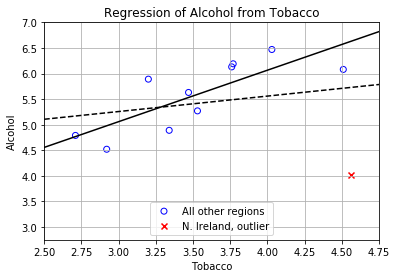

In [22]:
plt.scatter( df.Tobacco[:-1], df.Alcohol[:-1],
         marker='o', facecolors='none', edgecolors='b',
         label='All other regions')
 
plt.scatter( df.Tobacco[-1:], df.Alcohol[-1:],
         marker='x', color='r',
         label='N. Ireland, outlier')

test = np.arange( 2.5, 4.85, 0.1 )
test = np.array( np.matrix( test ).T )
 
plt.plot( test, cln.predict( test ), 'k' )
plt.plot( test, org.predict( test ), 'k--' )

plt.xlabel('Tobacco') ; 
plt.axis([2.5,4.75,2.75,7.0])
plt.ylabel('Alcohol')
plt.title('Regression of Alcohol from Tobacco') ;
plt.grid() ;
plt.legend(loc='lower center')
plt.show()